# Model Probabilty of Default - 12/23/2023


# Table of Content

* [1. Abstract](#1.-Abstract)
* [2. The Data](#2.-The-Data)
* [3. Data Cleaning, Preparing, and Basic Analysis](#3.-Data-Cleaning,-Preparing,-and-Basic-Analysis)
    * [3.1 Remove unsignificant columns such as loan_id](#3.1-Remove-unsignificant-columns-such-as-loan_id)
    * [3.2 Handle missing Values and Duplicates](#3.2-Handle-missing-Values-and-Duplicates)
    * [3.3 Handle outliers using cross tables and scatter plots](#3.3-Handle-outliers-using-cross-tables-and-scatter-plots)
    * [3.4 Checking the distribution of categorical features to identify important features before converting them to numerical](#3.4-Checking-the-distribution-of-categorical-features-to-identify-important-features-before-converting-them-to-numerical)
    * [3.5 Convert Categorical data to Numerical data](#3.5-Convert-Categorical-data-to-Numerical-data)
    * [3.6 Check Correlation matrix to remove any features](#3.6-Check-Correlation-matrix-to-remove-any-features)
    * [3.7 Split the data into training and testing by considering class imbalance](#3.7-Split-the-data-into-training-and-testing-by-considering-class-imbalance)
* [4. Model 1 - Logistic Regression](#4.-Model-1---Logistic-Regression)
    * [4.1 Identifying important features of logistic regression model using model’s coefficients](#4.1-Identifying-important-features-of-logistic-regression-model-using-model’s-coefficients)
    * [4.2 Evaluating model 1 - Logistic Regression](#4.2-Evaluating-model-1---Logistic-Regression)
    * [4.3 Log loss for model 1](#4.3-Log-loss-for-model-1)
* [5. Model 2 - Xgboost](#5.-Model-2---Xgboost)
    * [5.1 Identifying important features of Xgboost model using plot_importance](#5.1-Identifying-important-features-of-Xgboost-model-using-plot_importance)
    * [5.2 Evaluating model 2 - XGBoost](#5.2-Evaluating-model-2---XGBoost)
    * [5.3 Log loss for model 2](#5.3-Log-loss-for-model-2)
* [6. Comparison of the two models and conclusion](#6.-Comparison-of-the-two-models-and-conclusion )
    * [6.1 Explanation of the metrics used for comparison](#6.1-Explanation-of-the-metrics-used-for-comparison)
    


# 1. Abstract 
This notebook explores a data set to model Probability of Default(PD). PD is the likelihood that a borrower will fail to pay a certain debt. The likelihood of default plays a crucial role in evaluating credit risk and is essential in credit risk modeling, loan pricing, and portfolio management. It is used with other risk metrics like Loss Given Default (LGD) and Exposure at Default (EAD) to evaluate the overall credit risk of a loan or portfolio. These metrics aid financial institutions in devising informed decisions, appropriate risk management strategies, establishing risk-based pricing, and assigning capital reserves for potential losses. The PD is calculated using classification models such as logistic regression and decision trees and historical data by considering factors like financial health, credit history, and economic conditions. The models can be used to predict an estimate for the future defaults. 

First, the data set is cleaned and prepared for modelling. Then, two classification models are applied; Logistic regression model and XGBoost model. Using the in-build feature extraction methods most significant features are identified for both models by tracking the training error of the model. The optimal models that gives the best training error is obtained. The two models are then evaluated and compared using metrics like precision, recall, and F1 score. 

The analysis shown in this notebook can be used by banks or other financial institutions to gain insight of whether new loans are likely to be defaulted or not based on some information about the customer such as age, education, salary, etc. 
The institution can use this information to approve loans in the future. The models can be deployed in a bank system where customers can check by themselves if their loans will be approved or not. 


### Further developments: 
By analyzing the factors that affect the default rate the most, the financial institutions can advice their customers what they need to improve, in order to get their loan approved. 



## Quick view of results: 

|      |  Model 1 - Logistic Regression | Model 2 - XGBoost     |
| :---        |    :----:   |          :---: |
|    Training accuracy   | 58.0%       | 61.6%   |
| Testing accuracy   | 57.3%        |57.3%   |
|Log loss on training set|0.68|0.66|
|Log loss on testing set|0.68|0.68|
|TPR (Precision) | 0.58 | 0.6 |
|Recall|0.6|0.68|
|FPR|0.44|0.45|
|FNR|0.4|0.32|


# 2. The Data
The data file used in this notebook was gathered from Kaggle https://www.kaggle.com/datasets/gauravduttakiit/loan-default-prediction

The data set includes nine(9) features such as loan_id,age,education and has the target variable of whether the loan was defaulted or not. We are interested in building a model that predicts if a customer will default the loan or not. 

Here are all the features included in the data set and a short description of them.

| Feature Name | Description |
| :---   | :----------- |
|loan_id | Unique identifier of a loan|
|age | Age of the Applicant|
|Education | Applicant Education|
|proof_submitted | Type of proof submitted|
|loan_amount | Loan Amount Disbursed|
|asset_cost |  The total asset value of the applicant|
|no_of_loans | No. of the loans taken by the applicant|
|no_of_curr_loans  | No. of active loans held by the applicant|
|last_delinq_none | The loan defaulted in at least one of the past loans|
|loan_default (Target Variable) | 0/1 indicating if an applicant will default the loan or not|


In [337]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
!pip3 install xgboost

In [397]:
df = pd.read_csv('train.csv')
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


In [398]:
df

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6995,6996,45,2.0,Aadhar,930948,1258344,0,0,0,1
6996,6997,41,2.0,Aadhar,681108,791040,4,4,0,1
6997,6998,47,2.0,Aadhar,627636,720336,35,11,0,1
6998,6999,39,1.0,Aadhar,654708,793860,0,0,0,1


Here is the head of the data that will be using for the modelling. This data has 7000 total observations categorized into 9 features for modelling. 

# 3. Data Cleaning, Preparing, and Basic Analysis 

1. Remove unsignificant columns such as loan_id 
2. Handle missing Values and Duplicates
3. Handle outliers using cross tables and scatter plots
4. Checking the distribution of categorical features to identify important features before converting them to numerical. 
5. Convert Categorical data to Numerical data
6. Check Correlation matrix to remove any features
7. Split the data into training and testing by considering class imbalance


## 3.1 Remove unsignificant columns such as loan_id

Later in the analysis process, the most significant features can be explored using plot_importanc() method. 

In [399]:
#remove unsignificant columns as ID, Name, etc.
df = df.drop(['loan_id'], axis = 1)

## 3.2 Handle Missing Values and Duplicates

In [400]:
df.isna().sum()

age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

245 entries are missing from the column "education" in the data set.These constitute just 3.5% of data set and therefore,  the entire rows can be dropped. 

In [401]:
# Dropping the rows with education Null as it constitutes just 3.5% of data
df = df.dropna()

In [402]:
df

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,Aadhar,504264,820920,2,2,0,0
1,48,1.0,Aadhar,728556,831444,6,2,0,0
2,30,2.0,VoterID,642936,826092,0,0,0,1
3,28,1.0,Aadhar,746556,930924,0,0,0,0
4,29,1.0,Aadhar,1139880,1902000,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6995,45,2.0,Aadhar,930948,1258344,0,0,0,1
6996,41,2.0,Aadhar,681108,791040,4,4,0,1
6997,47,2.0,Aadhar,627636,720336,35,11,0,1
6998,39,1.0,Aadhar,654708,793860,0,0,0,1


In [344]:
df.duplicated().sum()

0

## 3.3 Handle outliers using cross tables and scatter plots

Visualize the data using seaborn pairplots to detect any outliers. 

In [288]:
df_sub1= df[['age','education','loan_amount','asset_cost','no_of_loans','no_of_curr_loans','last_delinq_none', 'loan_default']]

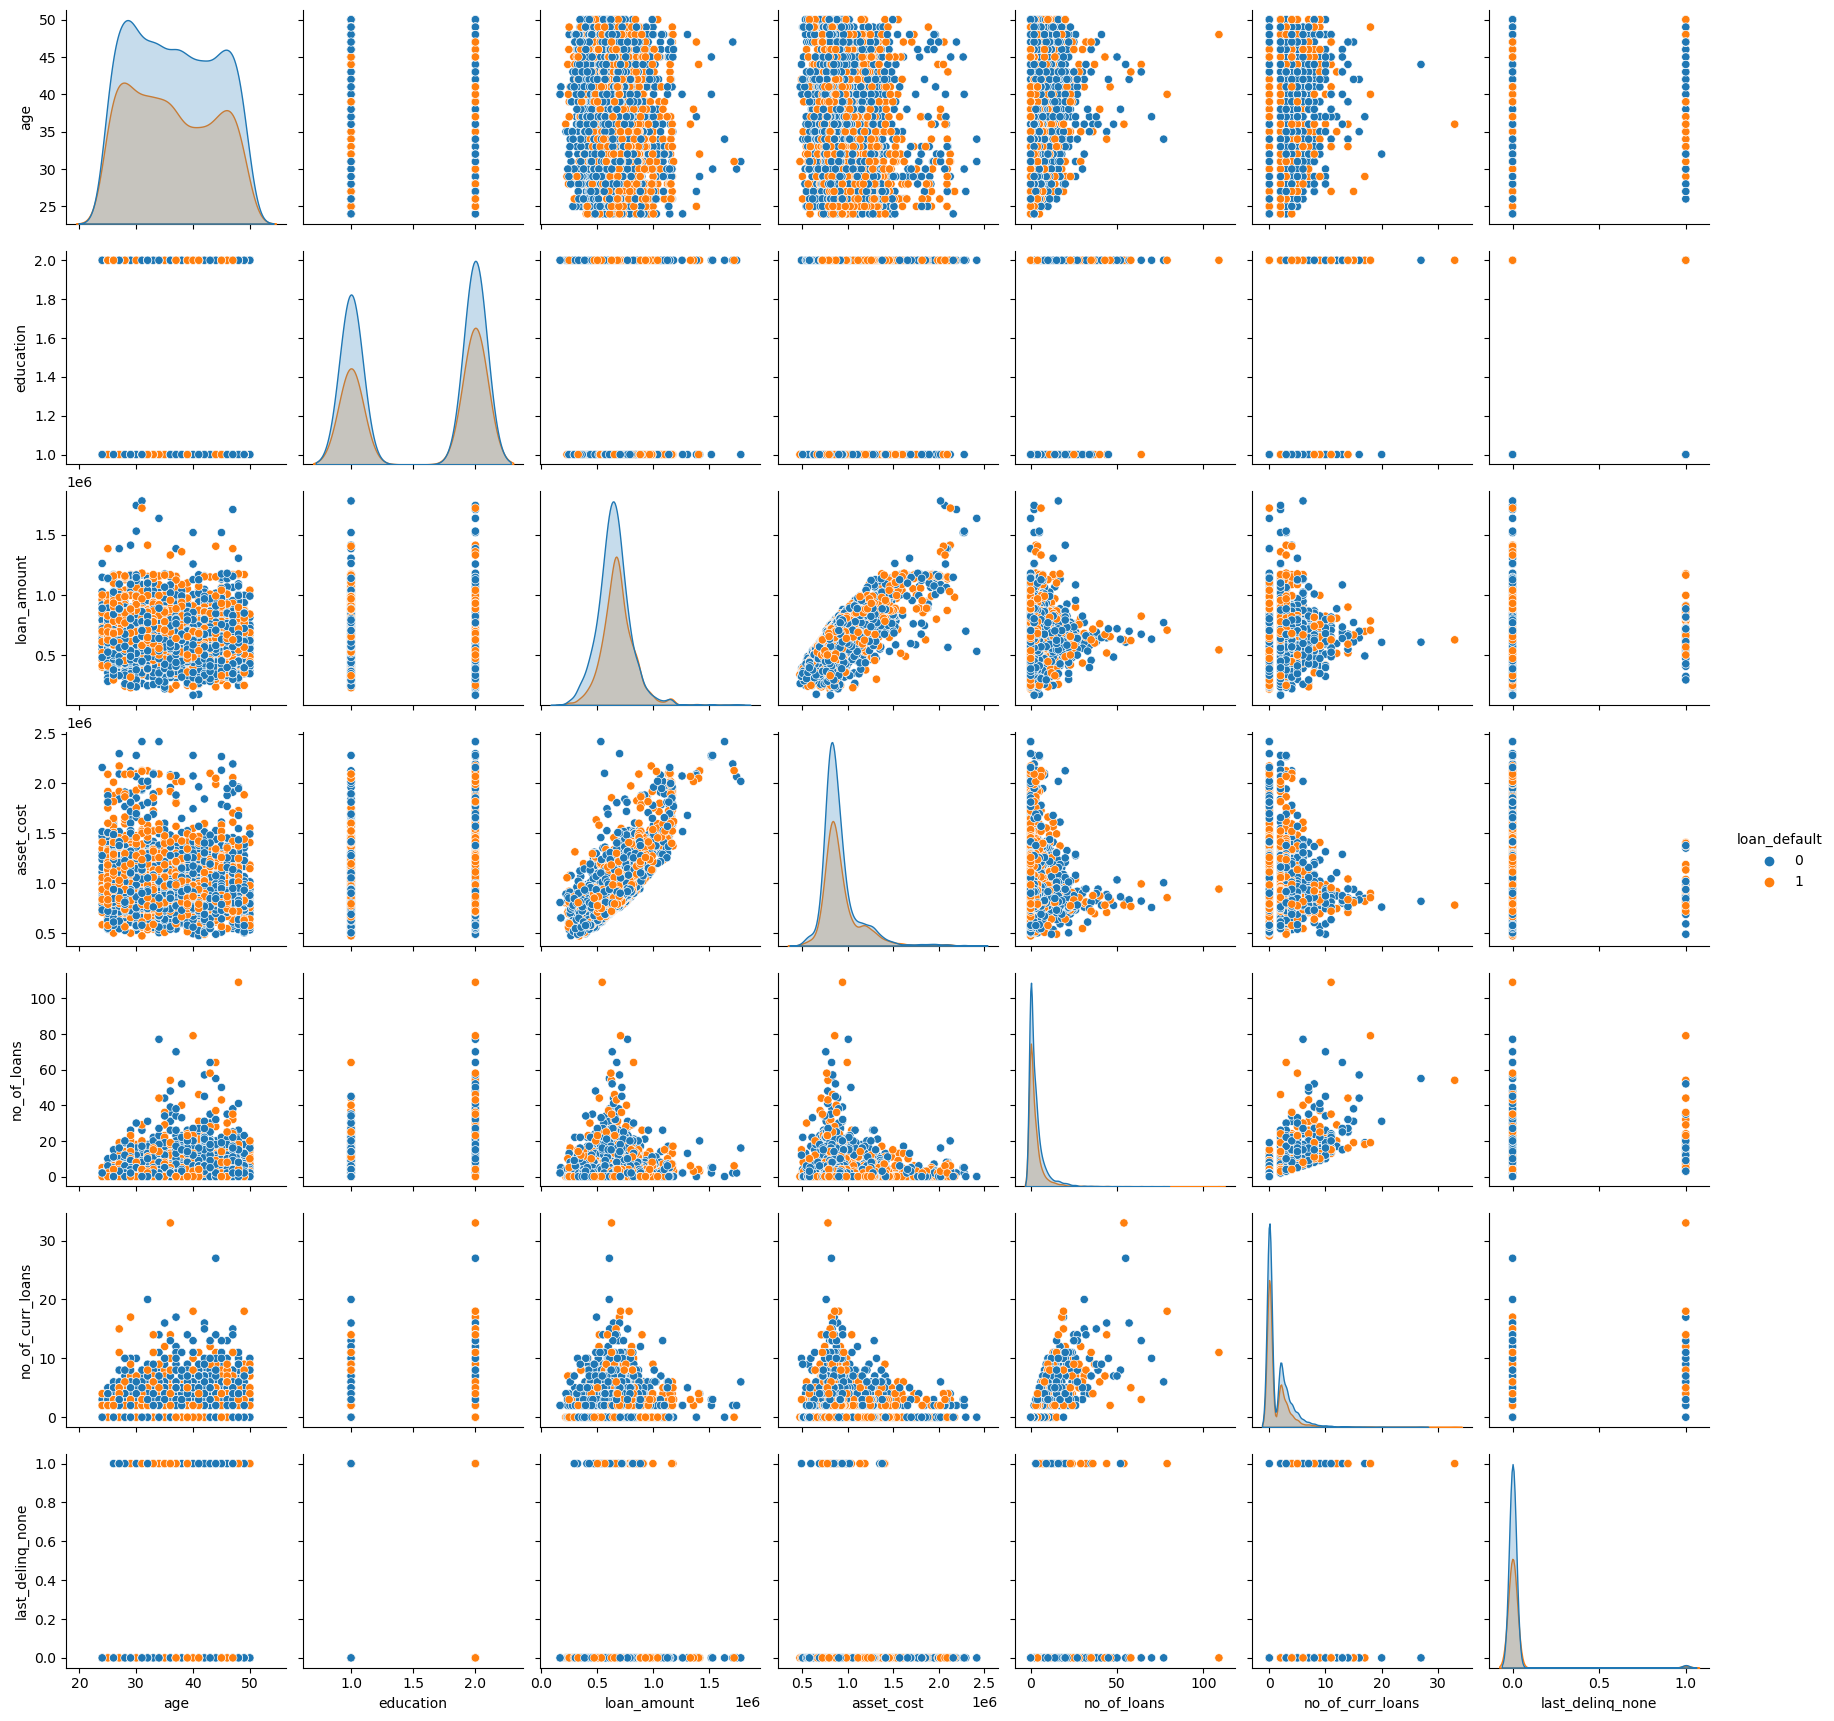

In [289]:
g = sns.pairplot(df_sub1,hue = 'loan_default')

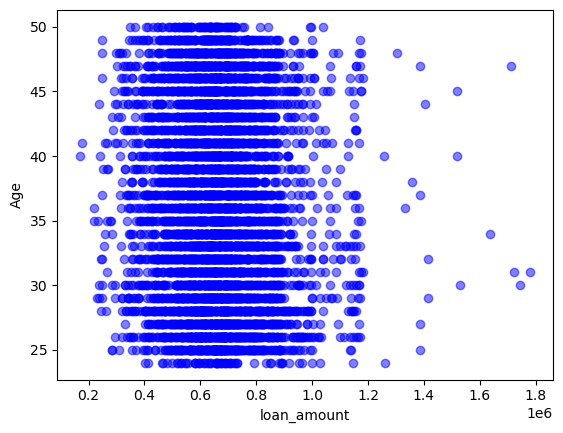

In [270]:
# Create a scatter plot of loan_amount vs person's age
plt.scatter(df['loan_amount'], df['age'],c='blue', alpha=0.5)
plt.xlabel('loan_amount')
plt.ylabel('Age')
plt.show()

Investigate the distribution of the target variable, loan_default


<AxesSubplot:xlabel='loan_default', ylabel='count'>

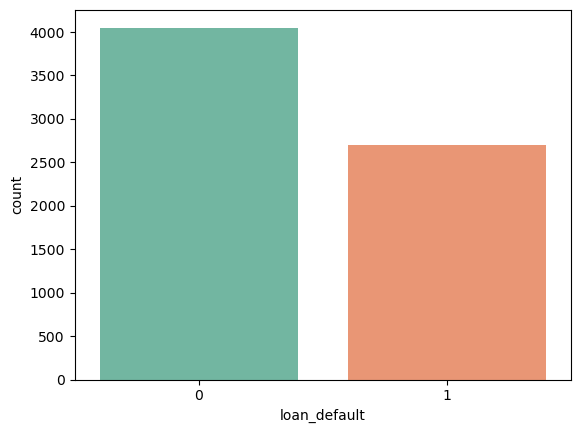

In [271]:
sns.countplot(x='loan_default',data = df,palette = 'Set2' )

Note that the data set is not perfectly balanced. Later before the we apply the models we will perform undersampling to balance the data set. 

## 3.4 Distribution of features
Looping through the feauters to identify any important information

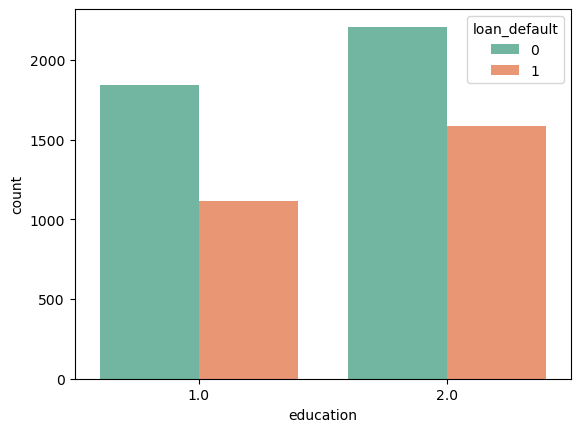

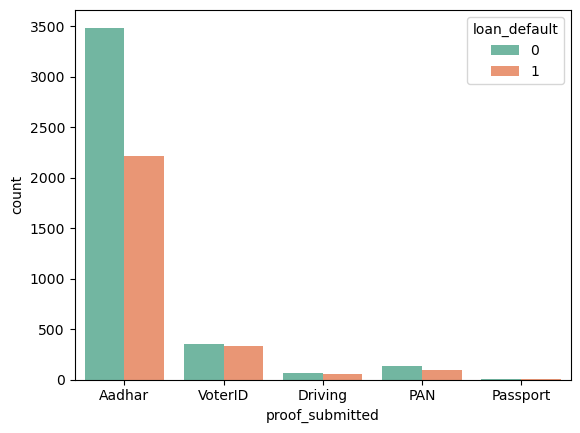

In [244]:
features = ['education', 'proof_submitted']
for f in features:
    sns.countplot(x=f, data = df,hue = 'loan_default',palette = 'Set2')
    plt.show()

Notice that majority of education feature are non defaults for both categories. Also, The Aadhar category in proof_submitted feature has the largest defaults compared to other categories of that feature. Later we will perform analysis to select the most significant features for the models. 

## 3.5 Convert Categorical data to Numerical data

In [403]:
#convert categorical columns to numeric columns in training data
proof_submitted_dummies = pd.get_dummies(df.proof_submitted).iloc[:,1:]
df = pd.concat([df, proof_submitted_dummies], axis=1)
df = df.drop(['proof_submitted'], axis = 1)
df

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,Driving,PAN,Passport,VoterID
0,27,1.0,504264,820920,2,2,0,0,0,0,0,0
1,48,1.0,728556,831444,6,2,0,0,0,0,0,0
2,30,2.0,642936,826092,0,0,0,1,0,0,0,1
3,28,1.0,746556,930924,0,0,0,0,0,0,0,0
4,29,1.0,1139880,1902000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,45,2.0,930948,1258344,0,0,0,1,0,0,0,0
6996,41,2.0,681108,791040,4,4,0,1,0,0,0,0
6997,47,2.0,627636,720336,35,11,0,1,0,0,0,0
6998,39,1.0,654708,793860,0,0,0,1,0,0,0,0


In [404]:
pd.crosstab(df['no_of_curr_loans'],df['loan_default'])

loan_default,0,1
no_of_curr_loans,,
0,2347,1699
2,716,474
3,391,241
4,227,119
5,147,72
6,76,28
7,50,26
8,33,17
9,17,8


The scatter plot shows that there are no outliers in the age data. 

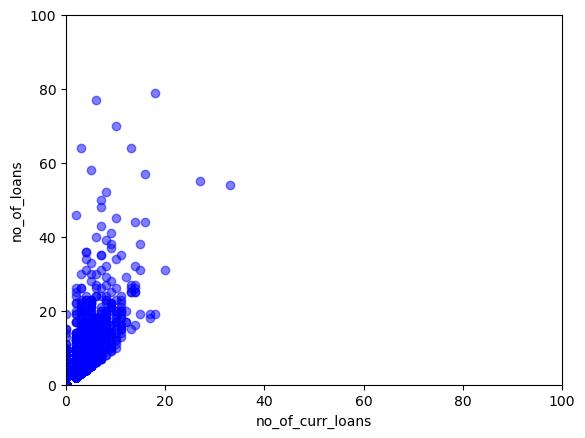

In [405]:
# Create a scatter plot of loan_default vs no_of_curr_loans
plt.scatter(df['no_of_curr_loans'], df['no_of_loans'],c='blue', alpha=0.5)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('no_of_curr_loans')
plt.ylabel('no_of_loans')
plt.show()

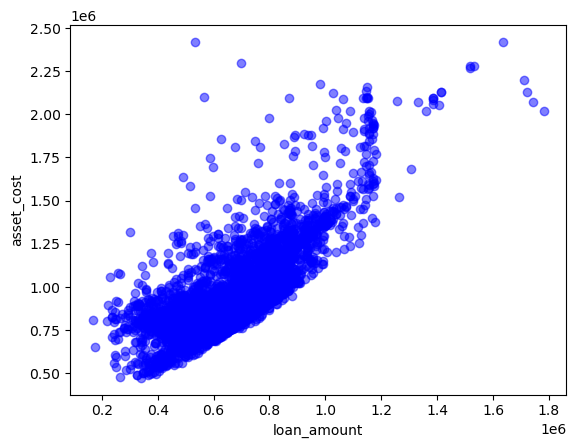

In [222]:
# Create a scatter plot of loan_amount vs person's age
plt.scatter(df['loan_amount'], df['asset_cost'],c='blue', alpha=0.5)
plt.xlabel('loan_amount')
plt.ylabel('asset_cost')
plt.show()

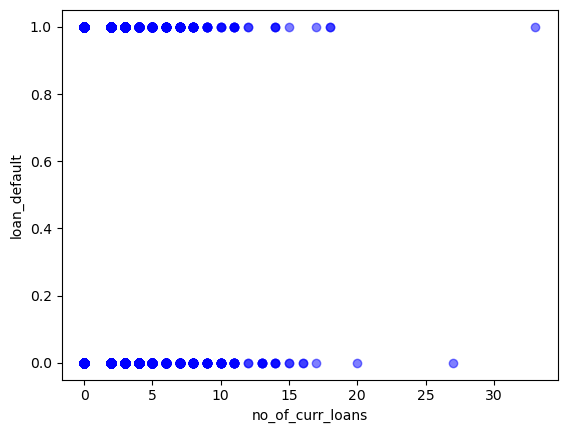

In [223]:
# Create a scatter plot of loan_default vs no_of_curr_loans
plt.scatter(df['no_of_curr_loans'], df['loan_default'],c='blue', alpha=0.5)
plt.xlabel('no_of_curr_loans')
plt.ylabel('loan_default')
plt.show()

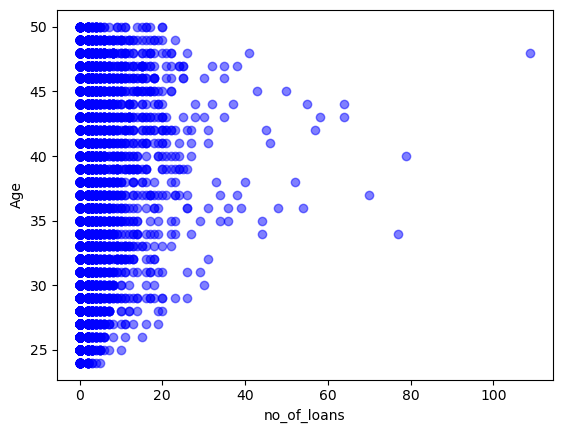

In [224]:
# Create a scatter plot of no_of_loans vs person's age
plt.scatter(df['no_of_loans'], df['age'],c='blue', alpha=0.5)
plt.xlabel('no_of_loans')
plt.ylabel('Age')
plt.show()

In [346]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6755 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               6755 non-null   int64  
 1   education         6755 non-null   float64
 2   loan_amount       6755 non-null   int64  
 3   asset_cost        6755 non-null   int64  
 4   no_of_loans       6755 non-null   int64  
 5   no_of_curr_loans  6755 non-null   int64  
 6   last_delinq_none  6755 non-null   int64  
 7   loan_default      6755 non-null   int64  
 8   Driving           6755 non-null   uint8  
 9   PAN               6755 non-null   uint8  
 10  Passport          6755 non-null   uint8  
 11  VoterID           6755 non-null   uint8  
dtypes: float64(1), int64(7), uint8(4)
memory usage: 501.3 KB


After cleaning and preparing the data set for modelling, there are 6755 total obervations. Excuding the target variable "loan_default" column, there are 11 features to be used. 

In [276]:
df.describe(include='all')

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,Driving,PAN,Passport,VoterID
count,6755.000000,6755.000000,6.755000e+03,6.755000e+03,6755.000000,6755.000000,6755.000000,6755.000000,6755.000000,6755.000000,6755.000000,6755.000000
mean,36.435825,1.561954,6.624794e+05,9.140440e+05,2.884530,1.389341,0.013620,0.400296,0.016876,0.034641,0.001776,0.102147
std,7.395716,0.496184,1.496051e+05,2.135128e+05,5.513194,2.206541,0.115914,0.489995,0.128818,0.182882,0.042114,0.302863
min,24.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,5.771940e+05,7.960740e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,2.000000,6.565560e+05,8.570760e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,2.000000,7.369560e+05,9.553620e+05,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.6 Corrlation matrix

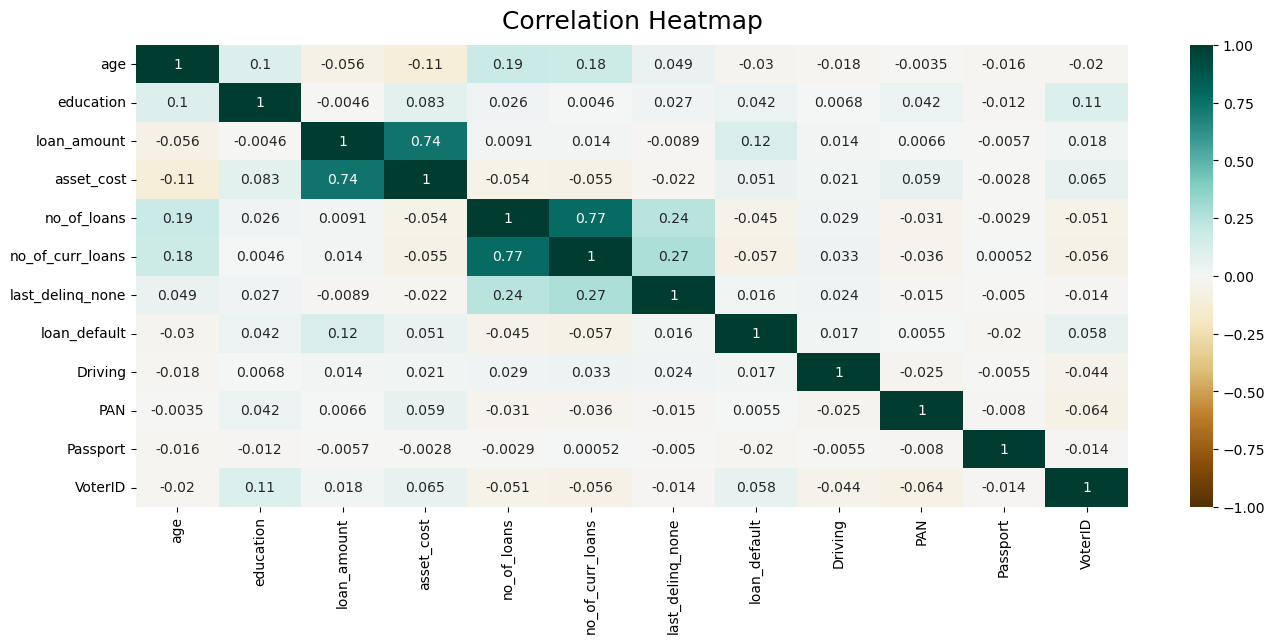

In [406]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [247]:
#df = df.drop(['asset_cost','no_of_loans'], axis = 1)

Based on the above correlation matrix, the features, asset_cost and loan_amount are highly correlated, so are the no_of_loans and no_of_curr_loans. Therefore, we can drop one feature from the two pairs to reduce the number of features. However, it was noticed that after dropping 'asset_cost' and 'no_of_loans' fetaures, the model accuracy decreased. This could be due the small number of features the model has. Hence, it was decided to keep both features until we perform feature importance for the two models to identify significant features. 

In [407]:
# count the number of defaults and non-defaults to check class imbalance
count_nondefaults, count_defaults = df['loan_default'].value_counts()
total_default = count_nondefaults+count_defaults
default_Per = count_defaults/total_default*100
non_default_Per = count_nondefaults/total_default*100
print("default percentage is %.2f" % default_Per)
print("Non default percentage is %.2f" % non_default_Per)

default percentage is 40.03
Non default percentage is 59.97


There is a clear split between the prection variable,where 40% of loans were defaulted, leaving the other ~60% to be non deafulted. Since nondefaults are larger, there is a class imbalance. Therefore, undersampling is perforemed to get same number of outputs for both classes and then split the data into training(60%) and testing(40%). 

## 3.7  Split Train and Test data by considering class imbalance

In [408]:
#separate defaults and nondefaults
nondefaults = df[df['loan_default']==0]
defaults = df[df['loan_default']==1]

#undersample using defaults because defaults are lower
nondefaults_under = nondefaults.sample(count_defaults)

#concat the undersampled non_defaults with the defaults
df_under = pd.concat([nondefaults_under.reset_index(drop = True),defaults.reset_index(drop = True)], axis = 0)

In [409]:
#split the data into training(60%) and testing(40%). 
X = df_under.drop('loan_default', axis=1)
Y = np.ravel(df_under[['loan_default']])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

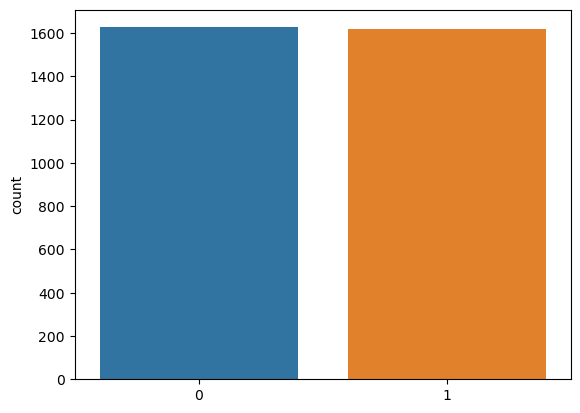

In [350]:
#Investigate the distributions of target variable after splitting
ax1 = sns.countplot(x = Y_train)

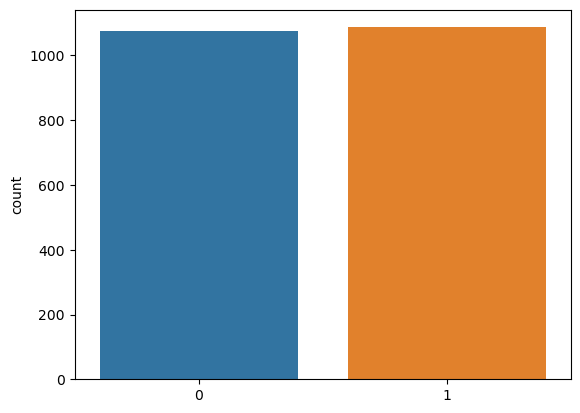

In [252]:
ax2 = sns.countplot(x = Y_test)

# 4. Model 1 - Logistic Regression


In [410]:
#scale the features using the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [460]:
from sklearn.metrics import accuracy_score
#Create a logistic regression model
model1 = LogisticRegression(solver='lbfgs')

#train the logistic regression
model1.fit(X_train,Y_train)
coefficients = model1.coef_[0]

#make predictions for the train data and test data and evaluate
test_predictions = model1.predict(X_test)
train_predictions = model1.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_predictions)
test_accuracy = accuracy_score(Y_test, test_predictions)
#print("Accuracy of logistic regression model with all features: %.2f%%" % (accuracy*100))

#Accuracy on the training data after selecting the best subset of features
print("The training accuracy with all the features is: ",model1.score(X_train, Y_train))

#Accuracy on the testing data after selecting the best subset of features
print("The testing accuracy with all the features is: ",model1.score(X_test, Y_test))

#Classification report
from sklearn.metrics import classification_report
Y_train_predict = model1.predict(X_train)
print(classification_report(Y_train, Y_train_predict))


The training accuracy with all the features is:  0.5807644882860666
The testing accuracy with all the features is:  0.572550831792976
              precision    recall  f1-score   support

           0       0.59      0.56      0.57      1627
           1       0.58      0.60      0.59      1617

    accuracy                           0.58      3244
   macro avg       0.58      0.58      0.58      3244
weighted avg       0.58      0.58      0.58      3244



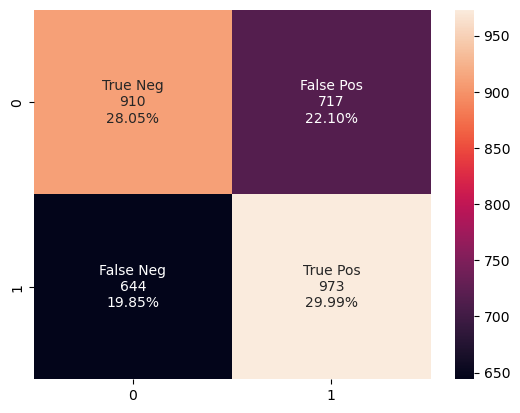

In [412]:
# confusion matrix for all the features, for the training set 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
#confusion matrix for model 1 with all the parameters
cm_all1 = confusion_matrix(Y_train, train_predictions) 
cm_norm = cm_all1/cm_all1.sum(axis=1).reshape(-1,1)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_all1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm_all1.flatten()/np.sum(cm_all1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_all1, annot=labels, fmt='')
plt.show()


## 4.1 Identifying important features of logistic regression model using model’s coefficients

The simplest way to calculate feature importance in binary logistic regression is using the model’s coefficients. The coefficients represent the change in the log odds for a one-unit change in the predictor variable. Larger absolute values indicate a stronger relationship between the predictor and the target variable.

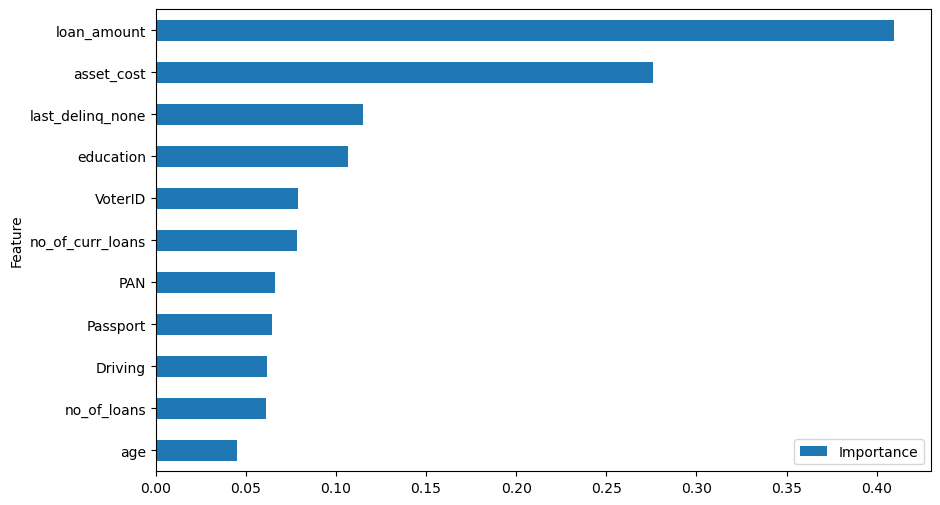

[0.04532498 0.06116022 0.0619167  0.06453068 0.066036   0.07831704
 0.07918236 0.10688257 0.11494166 0.27592415 0.4094413 ]


In [414]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()
print(feature_importance['Importance'].values)

In [ ]:
X_train.shape

In [415]:
thresholds = feature_importance['Importance'].values
train_accuracy_list = []
test_accuracy_list = []
feature_list = []
for thresh in thresholds:
    select = SelectFromModel(estimator=LogisticRegression(),threshold=thresh).fit(X_train, Y_train)
#selector.threshold_
    select_X_train = select.transform(X_train)
    select_model = LogisticRegression()
    select_model.fit(select_X_train, Y_train)
    select_X_test = select.transform(X_test)
    select_test_predictions = select_model.predict(select_X_test)
    select_train_predictions = select_model.predict(select_X_train)
    train_accuracy = accuracy_score(Y_train, select_train_predictions)
    test_accuracy = accuracy_score(Y_test, select_test_predictions)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    feature_idx = select.get_support()
    feature_name = X.columns[feature_idx]
    feature_list.append(feature_name)
    print(train_accuracy, test_accuracy, feature_name.shape[0],thresh)
#print(accuracy_list,feature_list)


0.5804562268803946 0.572550831792976 11 0.04532497725432488
0.5789149198520345 0.5730129390018485 10 0.06116021785054097
0.5742909987669543 0.5753234750462107 9 0.06191670496345594
0.5736744759556104 0.5734750462107209 8 0.06453068268005917
0.5739827373612824 0.5743992606284658 7 0.06603600476884577
0.5739827373612824 0.5739371534195934 6 0.07831703703019834
0.561960542540074 0.5656192236598891 5 0.07918236467076968
0.563193588162762 0.5559149722735675 4 0.10688256982871244
0.5505548705302096 0.5600739371534196 3 0.11494165961843582
0.5545622688039458 0.5637707948243993 2 0.27592414751482885
0.5483970406905055 0.5637707948243993 1 0.4094413028884624


In [416]:
accuray_feature = dict(zip(train_accuracy_list, feature_list))
print("The feature list that gives the highest train accuracy is", feature_list[train_accuracy_list.index(max(train_accuracy_list))],max(train_accuracy_list))
accuray_thresh = dict(zip(train_accuracy_list, thresholds))
print("The threshold that gives the highest train accuracy is", thresholds[train_accuracy_list.index(max(train_accuracy_list))])

The feature list that gives the highest train accuracy is Index(['age', 'education', 'loan_amount', 'asset_cost', 'no_of_loans',
       'no_of_curr_loans', 'last_delinq_none', 'Driving', 'PAN', 'Passport',
       'VoterID'],
      dtype='object') 0.5804562268803946
The threshold that gives the highest train accuracy is 0.04532497725432488


In [417]:
#Train the model with the threshold that gives the best set of features
opt_thresh = thresholds[train_accuracy_list.index(max(train_accuracy_list))]
select = SelectFromModel(estimator=LogisticRegression(),threshold=opt_thresh).fit(X_train, Y_train)
select_X_train = select.transform(X_train)
select_model = LogisticRegression()
select_model.fit(select_X_train, Y_train)
select_X_test = select.transform(X_test)
predictions = select_model.predict(select_X_test)
best_model_accuracy = accuracy_score(Y_test, predictions)
print("best model accuracy on testing data is ", best_model_accuracy)

best model accuracy on testing data is  0.572550831792976


After looking at the feature importance, we can see that the highest accuracy on training data is given when all the features are used. At this case the accuracy of the model on the testing data set is almost similar to the accuracy on the training error. 

## 4.2 Evaluating model 1 - Logistic Regression


In [418]:
#Accuracy on the training data after selecting the best subset of features
print("The training accuracy is: ",select_model.score(select_X_train, Y_train))

#Accuracy on the testing data after selecting the best subset of features
print("The testing accuracy is: ",select_model.score(select_X_test, Y_test))

#Classification report
from sklearn.metrics import classification_report
Y_train_predict = select_model.predict(select_X_train)
Y_test_predict = select_model.predict(select_X_test)
print(classification_report(Y_train, Y_train_predict))
print(classification_report(Y_test, Y_test_predict))

The training accuracy is:  0.5804562268803946
The testing accuracy is:  0.572550831792976
              precision    recall  f1-score   support

           0       0.59      0.56      0.57      1627
           1       0.58      0.60      0.59      1617

    accuracy                           0.58      3244
   macro avg       0.58      0.58      0.58      3244
weighted avg       0.58      0.58      0.58      3244

              precision    recall  f1-score   support

           0       0.58      0.54      0.56      1077
           1       0.57      0.61      0.59      1087

    accuracy                           0.57      2164
   macro avg       0.57      0.57      0.57      2164
weighted avg       0.57      0.57      0.57      2164



In [420]:
FN = cm_all1[1][0]/cm_all1.sum()*100
FP = cm_all1[0][1]/cm_all1.sum()*100
TN = cm_all1[0][0]/cm_all1.sum()*100
TP = cm_all1[1][1]/cm_all1.sum()*100

print('FN=The model falsely predicted that', str(round(FN, 2)),'% will not default even though they actually did')
print('FP=The model falsely predicted that', str(round(FP, 2)),'% will default even though they actually did not')

#Precision
TPR = TP/(TP+FP)
print("The True Positive Rate (Precision) is:", str(round(TPR, 2)))

#Recall
Recall = TP/(TP+FN)
print("The Recall is:", str(round(Recall, 2)))

#False positive Rate
FPR = FP/(FP+TN)
print("The False Positive rate is:" ,str(round(FPR, 2)))

#False negative rate 
FNR = FN/(FN+TP)
print("The False Negative rate is:", str(round(FNR, 2)))



FN=The model falsely predicted that 19.85 % will not default even though they actually did
FP=The model falsely predicted that 22.1 % will default even though they actually did not
The True Positive Rate (Precision) is: 0.58
The Recall is: 0.6
The False Positive rate is: 0.44
The False Negative rate is: 0.4


## 4.3 Log loss for model 1

In [421]:
#Log loss on training data set for model 1
from sklearn.metrics import log_loss
Y_train_pred_prob = select_model.predict_proba(select_X_train)
print("The log loss on training data set for model 1 is:", log_loss(Y_train, Y_train_pred_prob))


#log loss on testing data set for model 1
Y_test_pred_prob = select_model.predict_proba(select_X_test)
print("The log loss on testing data set for model 1 is:", log_loss(Y_test, Y_test_pred_prob))

The log loss on training data set for model 1 is: 0.6798606352991181
The log loss on testing data set for model 1 is: 0.6811925768430208


# 5. Model 2 - Xgboost

In [ ]:
!pip3 install xgboost

In [489]:
#create a gradient boosted tree model
#model2 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(max_depth=3, learning_rate=0.04)
#smaller learnng rate makeseach step more conservative,max_depth is how deep each tree can go. 
#larger max_depth meansmore complex.


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#train the gradient boosted tree 
model2.fit(X_train,Y_train)

#make predictions for the train data and test data and evaluate
test_predictions = model2.predict(X_test)
train_predictions = model2.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_predictions)
test_accuracy = accuracy_score(Y_test, test_predictions)
#print("Accuracy of logistic regression model with all features: %.2f%%" % (accuracy*100))

#Accuracy on the training data after selecting the best subset of features
print("The training accuracy with all the features is: ",model2.score(X_train, Y_train))

#Accuracy on the testing data after selecting the best subset of features
print("The testing accuracy with all the features is: ",model2.score(X_test, Y_test))


#Classification report
from sklearn.metrics import classification_report
Y_train_predict = model2.predict(X_train)
Y_test_predict = model2.predict(X_test)
print(classification_report(Y_train, Y_train_predict))
print(classification_report(Y_test, Y_test_predict))

The training accuracy with all the features is:  0.6162145499383477
The testing accuracy with all the features is:  0.572550831792976
              precision    recall  f1-score   support

           0       0.64      0.55      0.59      1627
           1       0.60      0.68      0.64      1617

    accuracy                           0.62      3244
   macro avg       0.62      0.62      0.61      3244
weighted avg       0.62      0.62      0.61      3244

              precision    recall  f1-score   support

           0       0.58      0.49      0.53      1077
           1       0.56      0.65      0.60      1087

    accuracy                           0.57      2164
   macro avg       0.57      0.57      0.57      2164
weighted avg       0.57      0.57      0.57      2164



With the default parameters of XGBoost model, the training accuracy and testing accuracy were 90.8% and 52.5% respectively, which clearly indicates overfitting. 
By using cross validation, model calibration/tuning can be performed to find the best hyper-parameters to obtain better performance. This is not done in this notebook. 
A balance between training and testing accuracy was obtained by manually changing the parameter values and observing the outcomes. It was then decided to choose max_depth=3, learning_rate=0.04 that increased the testing accuracy by about 5% although it reduced the training accuracy by about 28%.

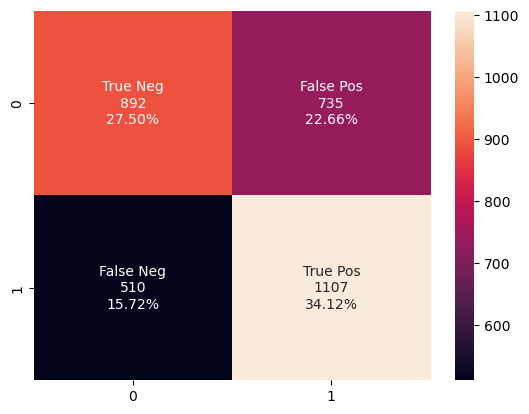

In [490]:
# confusion matrix for all features, for the training set 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
cm_all2= confusion_matrix(Y_train, Y_train_predict)
cm_norm_all2 = cm_all2/cm_all2.sum(axis=1).reshape(-1,1)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_all2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm_all2.flatten()/np.sum(cm_all2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_all2, annot=labels, fmt='')
plt.show()

## 5.1 Identifying important features of Xgboost model using plot_importance

In [424]:
#print the important features using .get_booster().get_score() method
model2.get_booster().get_score(importance_type = 'weight')

{'f0': 781.0,
 'f1': 146.0,
 'f2': 1173.0,
 'f3': 1289.0,
 'f4': 341.0,
 'f5': 227.0,
 'f6': 18.0,
 'f7': 6.0,
 'f8': 19.0,
 'f9': 3.0,
 'f10': 47.0}

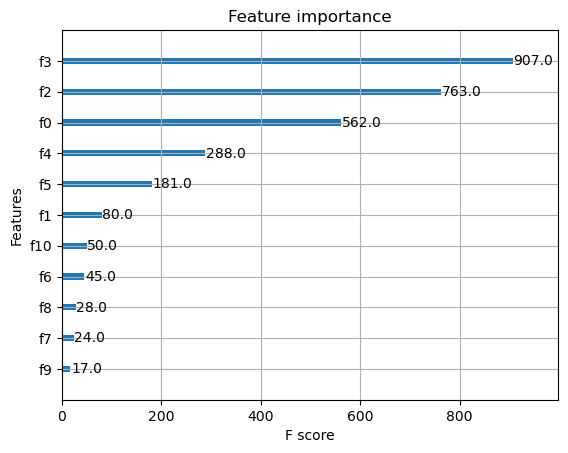

In [464]:
#print the important features using plot_importance() method
xgb.plot_importance(model2, importance_type = 'weight')#, ax=plt.gca())
plt.show()

In [491]:
create_thresh = np.linspace(0, 0.14,25, endpoint=False)
#thresh = create_thresh[6]
train_accuracy_list = []
test_accuracy_list = []
feature_list = []
for thresh in create_thresh:
    select = SelectFromModel(estimator=xgb.XGBClassifier(),threshold=thresh).fit(X_train, Y_train)
#selector.threshold_
    select_X_train = select.transform(X_train)
    select_model = xgb.XGBClassifier(max_depth=3, learning_rate=0.04)
    select_model.fit(select_X_train, Y_train)
    select_X_test = select.transform(X_test)
    select_test_predictions = select_model.predict(select_X_test)
    select_train_predictions = select_model.predict(select_X_train)
    train_accuracy = accuracy_score(Y_train, select_train_predictions)
    test_accuracy = accuracy_score(Y_test, select_test_predictions)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    feature_idx = select.get_support()
    feature_name = X.columns[feature_idx]
    feature_list.append(feature_name)
    print(train_accuracy, test_accuracy, feature_name.shape[0],thresh)
#print(accuracy_list,feature_list)


0.6162145499383477 0.572550831792976 11 0.0
0.6162145499383477 0.572550831792976 11 0.005600000000000001
0.6162145499383477 0.572550831792976 11 0.011200000000000002
0.6162145499383477 0.572550831792976 11 0.016800000000000002
0.6162145499383477 0.572550831792976 11 0.022400000000000003
0.6162145499383477 0.572550831792976 11 0.028000000000000004
0.6162145499383477 0.572550831792976 11 0.033600000000000005
0.6177558569667078 0.5707024029574861 10 0.039200000000000006
0.6177558569667078 0.5707024029574861 10 0.044800000000000006
0.6177558569667078 0.5707024029574861 10 0.05040000000000001
0.6177558569667078 0.5707024029574861 10 0.05600000000000001
0.6177558569667078 0.5707024029574861 10 0.06160000000000001
0.6177558569667078 0.5707024029574861 10 0.06720000000000001
0.6177558569667078 0.5707024029574861 10 0.0728
0.6177558569667078 0.5707024029574861 10 0.07840000000000001
0.6112823674475956 0.5656192236598891 9 0.08400000000000002
0.6094327990135635 0.5743992606284658 7 0.08960000000

After looking at the feature importance, we can see that the highest training accuracy on training data is obtained when one parameter is dropped. SInce dropping this parameter doesn't show a significant improvement in the accuracies it was decided to keep all the parameters. 

## 5.2 Evaluating model 2 - XGBoost

In [492]:
FN = cm_all2[1][0]/cm_all2.sum()*100
FP = cm_all2[0][1]/cm_all2.sum()*100
TN = cm_all2[0][0]/cm_all2.sum()*100
TP = cm_all2[1][1]/cm_all2.sum()*100

print('FN=The model falsely predicted that', str(round(FN, 2)),'% will not default even though they actually did')
print('FP=The model falsely predicted that', str(round(FP, 2)),'% will default even though they actually did not')

#Precision
TPR = TP/(TP+FP)
print("The True Positive Rate (Precision) is:", str(round(TPR, 2)))

#Recall
Recall = TP/(TP+FN)
print("The Recall is:", str(round(Recall, 2)))

#False positive Rate
FPR = FP/(FP+TN)
print("The False Positive rate is:" ,str(round(FPR, 2)))

#False negative rate 
FNR = FN/(FN+TP)
print("The False Negative rate is:", str(round(FNR, 2)))



FN=The model falsely predicted that 15.72 % will not default even though they actually did
FP=The model falsely predicted that 22.66 % will default even though they actually did not
The True Positive Rate (Precision) is: 0.6
The Recall is: 0.68
The False Positive rate is: 0.45
The False Negative rate is: 0.32


## 5.3 Log loss for model 2

In [493]:
#Log loss on training data set for model 2
from sklearn.metrics import log_loss
Y_train_pred_prob2 = model2.predict_proba(X_train)
print("The log loss on training data set for model 2 is:", log_loss(Y_train, Y_train_pred_prob2))


#log loss on testing data set for model 2
Y_test_pred_prob2 = model2.predict_proba(X_test)
print("The log loss on testing data set for model 2 is:", log_loss(Y_test, Y_test_pred_prob2))

The log loss on training data set for model 2 is: 0.6598946732892649
The log loss on testing data set for model 2 is: 0.6837494237255477


# 6. Comparison of the two models and conclusion

## 6.1 Explanation of the metrics used for comparison

True Positive Rate(TPR) / Precision is defined as 

\begin{equation}
TPR (Precision) = \frac{TP}{(TP+FP)}
\end{equation}

* Precision describes the proportion of correctly detected positives out of all the positives in the data set. In our example, this is the proportion of correctly detected defaults among all the defaults. Thus, we want this value to be close to 1. 

Recall is defined as 
\begin{equation}
Recall = \frac{TP}{(TP+FN)}
\end{equation}

False Negative Rate(FNR) is defined as 1-Specificity, where 

\begin{equation}
Specificity = \frac{TN}{(TN+FP)}
\end{equation}

* Specificity describes the proportion of correctly detected negatoves out of all the negatives in the data set. In our example, this is the proportion of correctly detected non-defaults among all the non-defaults. Thus, we want this value to be close to 1.
* FNR is the error of the negative cases. Thus, we want that value to be close to 0. 


## Comparison

Notice that for both models, the feature extraction didn't reduce the number of features. TPR (Precision), Specificity, and FNR that are calculated below are based on the confusion matrix of training set.

|      |  Model 1 - Logistic Regression | Model 2 - XGBoost     |
| :---        |    :----:   |          :---: |
|    Training accuracy   | 58.0%       | 61.6%   |
| Testing accuracy   | 57.3%        |57.3%   |
|Log loss on training set|0.68|0.66|
|Log loss on testing set|0.68|0.68|
|TPR (Precision) | 0.58 | 0.6 |
|Recall|0.6|0.68|
|FPR|0.44|0.45|
|FNR|0.4|0.32|



## Conclusion

* Both models have relatively low accuracy values for both training and testing sets. 
* Log loss is similar for both values. 
* Overall, model 2 is better when comparing the metrics, Precision and FNR. 
